# Support Vector Machines #

 ## 1. Introduction ##
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.
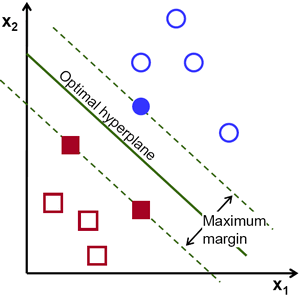

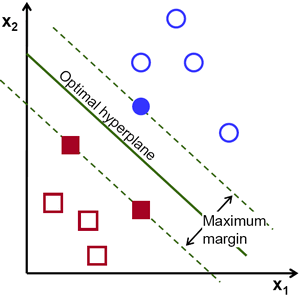

## 1. Imported Libraries ##

In [25]:
import numpy as np 
import pandas as pd 

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## 2. Read the data ##

In [26]:
data = pd.read_csv('austin_weather.csv')
data

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [27]:
print('DATA SHAPE: {}'.format(data.shape))
print('------------------------------------------------------------------')
print('FEATURES LIST AND TYPES:\n{}'.format(data.dtypes))
print('------------------------------------------------------------------')
print('NUMBER OF NaNs PER FEATURE:\n{}'.format(data.isnull().sum(axis=0)))


DATA SHAPE: (1319, 21)
------------------------------------------------------------------
FEATURES LIST AND TYPES:
Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object
------------------------------------------------------------------
NUMBER OF NaNs PER FEATURE:

## 3. Reshape the  Data ##

There is no Nans. The  dataset shows that in place of missing values there is the string. So we should replace Nan with '-', and impute the missing value. The feature 'PrecipitationSumInches' uses the value 'T' to represent trace amounts of precipitation. we should either assign a value lower than the lowest value (e.g. 0.0005 since the lowest value is 0.01) or assign 0. I'll choose the first option since it seems the most correct.

In [28]:
from sklearn.impute import SimpleImputer

# replacing ' ' with 'Clear'
data['Events'] = data['Events'].replace(' ', 'Clear')
# printing '-' and 'T' count before removing them
number_of_nans = data.stack().value_counts()['-']
number_of_ts = data.stack().value_counts()['T']
print('BEFORE imputing and replacing, in the dataset there are {} "-" and {} "Ts"'.format(number_of_nans,number_of_ts))

# replacing '-' with NaN to later use SimpleImputer
data = data.replace('-', float('NaN'))
data['PrecipitationSumInches'] = data['PrecipitationSumInches'].replace('T', 0.0005)

# list of features to be checked for NaNs, imputing
to_be_imputed = list(set(data.columns)-set(['Date', 'Events']))

imp = SimpleImputer(missing_values=float('NaN'), strategy='mean')
data[to_be_imputed] = imp.fit_transform(data[to_be_imputed])

# printing '-' and 'T' count after removing them
if '-' not in data.stack().value_counts(): number_of_nans = 0
if 'T' not in data.stack().value_counts(): number_of_ts = 0
print('AFTER imputing and replacing, in the dataset there are {} "-" and {} "Ts"'.format(number_of_nans,number_of_ts))

BEFORE imputing and replacing, in the dataset there are 80 "-" and 124 "Ts"
AFTER imputing and replacing, in the dataset there are 0 "-" and 0 "Ts"


## 4. Scaling ##

We use the Min-Max scaler which follows the formula:
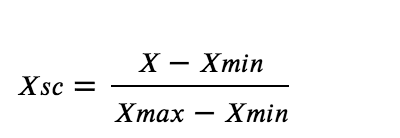

It does is shrink the range of values to [0, 1] or [-1, 1] if there are negative values

In [29]:
from sklearn.preprocessing import MinMaxScaler


scaled_data = data.copy()
to_be_scaled = list(set(data.columns)-set(['Date', 'Events']))
scaler = MinMaxScaler()
scaler.fit(data[to_be_scaled])
scaled_data[to_be_scaled] = scaler.transform(data[to_be_scaled])

 ## Label the Data ##
 To encode the target feature,The encoder encodes each value to a value in  [0,𝑛𝑐𝑙𝑎𝑠𝑠𝑒𝑠−1] 

1.no rain, then label = 0

2.thunderstorm, then label = 2

3.other label = 1

In [30]:
from sklearn.preprocessing import LabelEncoder

# encoding
preprocessed_data = scaled_data
encoder = LabelEncoder()
encoder.fit(scaled_data['Events'])
preprocessed_data['Events'] = encoder.transform(scaled_data['Events'])

# printing
classes_occurrences = preprocessed_data['Events'].value_counts().to_frame()
classes_occurrences['Class'] = encoder.inverse_transform(classes_occurrences.index)
classes_occurrences = classes_occurrences.sort_index(axis=0)
print(classes_occurrences)



   Events                      Class
0     903                      Clear
1      21                        Fog
2      14                 Fog , Rain
3      33  Fog , Rain , Thunderstorm
4       1         Fog , Thunderstorm
5     192                       Rain
6       1                Rain , Snow
7     137        Rain , Thunderstorm
8      17               Thunderstorm


In [31]:
# relabeling
preprocessed_data['Events'] = preprocessed_data['Events'].replace([0,1], 0)
preprocessed_data['Events'] = preprocessed_data['Events'].replace([2,5,6], 1)
preprocessed_data['Events'] = preprocessed_data['Events'].replace([3,4,7,8], 2)

# printing classes and number of occurrences
classes_occurrences = preprocessed_data['Events'].value_counts().to_frame()
classes_occurrences['Class'] = ['Clear', 'Rain', 'Thunderstorm']
classes_occurrences = classes_occurrences.sort_index(axis=0)
print(classes_occurrences)

   Events         Class
0     924         Clear
1     207          Rain
2     188  Thunderstorm


## 5.Original data Vs Scaled Data ##
plot the same scatter plot with the original and scaled features. The features i chose are: Humidity and Precipitation. Being both measured with positive values, min-max scaler scales the values in the range [0, 1]. The color of the data points drawn is based on the class they are example of.

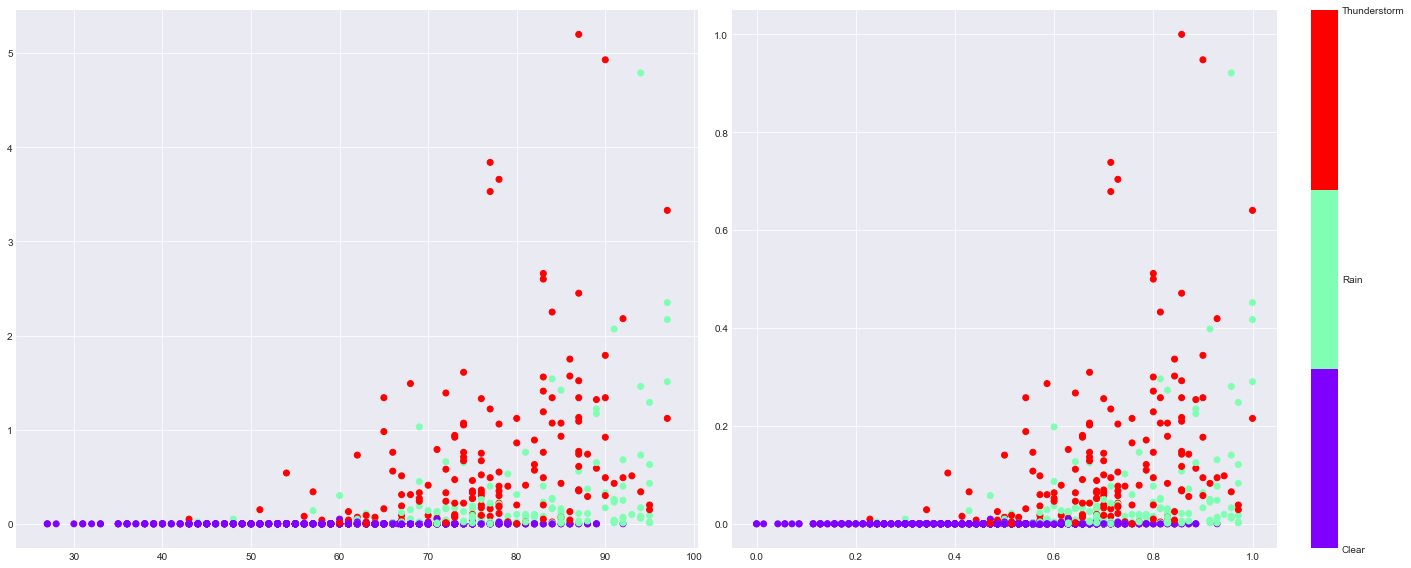

In [32]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('seaborn-darkgrid')

x_axis_original = data['HumidityAvgPercent']
y_axis_original = data['PrecipitationSumInches']

x_axis_scaled = preprocessed_data['HumidityAvgPercent']
y_axis_scaled = preprocessed_data['PrecipitationSumInches']

rainbow = cm.get_cmap('rainbow', 3)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
axes[0].scatter(x_axis_original, y_axis_original, c=preprocessed_data['Events'], cmap=rainbow)
right_plot = axes[1].scatter(x_axis_scaled, y_axis_scaled, c=preprocessed_data['Events'], cmap=rainbow)
cbar = fig.colorbar(right_plot,ticks=[0, 1, 2])
cbar.ax.set_yticklabels(classes_occurrences['Class'])
plt.tight_layout()

## Feature Extraction/Selection: PCA¶ ##

we should do some feature extraction/selection. I'll then try classification. In a nutshell PCA finds a new set of axes that maximizes the variance in the data. The axes are ordered such that the variance in  (𝑖,𝑖)  is greater than the variance in  (𝑖+1,𝑖+1) . By taking the first  𝑁  axes then, we will have the  𝑁  axes that better represent the data. In this case, only have 20 features, and all of them are quite relevant. Using PCA may be overkill. However to experiment with PCA, keep 20 components, and then train the classification algorithm iteratively with increasing number of components, to see the effects on the performances.

In [33]:
from sklearn.decomposition import PCA

features = list(set(preprocessed_data.columns)-set(['Date', 'Events']))

# the set of first 10 features extracted with PCA
pca = PCA(n_components=len(features))
pca.fit(preprocessed_data[features])
X_PCA = pd.DataFrame(data=pca.transform(preprocessed_data[features]))

y = preprocessed_data['Events']

print('X_PCA shape: {}'.format(X_PCA.shape))


X_PCA shape: (1319, 19)


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# function i'll use later to asses the model's performances
def evaluate(y_test, y_pred, avg):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=avg)
    recall = recall_score(y_test, y_pred, average=avg)
    f1 = f1_score(y_test, y_pred, average=avg)

    return (accuracy, precision, recall, f1)

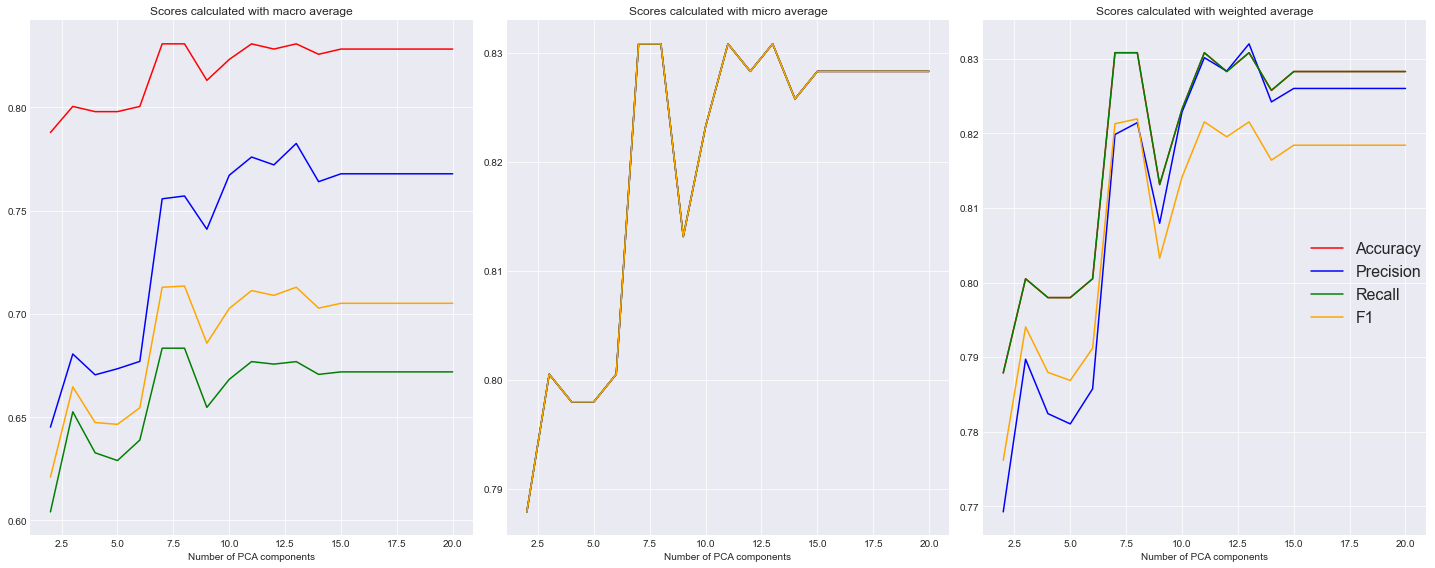

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# for storing scores
accuracies = []
precisions = [[],[],[]]
recalls = [[],[],[]]
f1s = [[],[],[]]
# different ways of calculating the average
avgs = ['macro', 'micro', 'weighted']

# each iteration increases by one the number of principal components used for the training
for i in range(2, 21):
    X_train, X_test, y_train, y_test = train_test_split(X_PCA[X_PCA.columns[:i]], y, test_size=0.3, random_state=0) # 70 - 30 split
    clf = SVC(gamma='auto', kernel='linear')
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    # saving scores for later plotting
    for j in range(len(avgs)):
        acc, prec, rec, f1 = evaluate(y_test, predictions, avgs[j])
        precisions[j].append(prec)
        recalls[j].append(rec)
        f1s[j].append(f1)   
        if j==0:
            accuracies.append(acc)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
lines = []
for i in range(3):
    l1=axes[i].plot(range(2,21), accuracies, color='red')[0]
    l2=axes[i].plot(range(2,21), precisions[i], color='blue')[0]
    l3=axes[i].plot(range(2,21), recalls[i], color='green')[0]
    l4=axes[i].plot(range(2,21), f1s[i], color='orange')[0]
    lines = [l1, l2, l3, l4]
    axes[i].set_title('Scores calculated with {} average'.format(avgs[i]))
    axes[i].set(xlabel='Number of PCA components')
fig.legend(lines, ['Accuracy', 'Precision', 'Recall', 'F1'], loc='center right', fontsize=16)
plt.tight_layout()

Here we can see how using different ways of calculating the average (for multiclass problems) affects the scores. The scores used are:

Accuracy:   Correct Predictions  Total Predictions  
Precision:   True Positive  True Positive + False Positive  
Recall:   True Positive  True Positive + False Negative  
F1:  2⋅ Precision ⋅ Recall  Precision + Recall  
Accuracy is the simplest score but can be misleading when the number of examples of different classes are disproportionate. Precision should be maximized when it's important to minimize false positives Recall should be maximized when it's important to minimize false positives  𝐹1  is an instance of  𝐹  Measure where  𝛽=1 . Given the definition of  𝐹  measure:
(1+𝛽2)⋅ Precision ⋅ Recall (𝛽2⋅ Precision )+ Recall 
 
When  𝛽>1  the  𝐹  measure weighs recall higher, when  𝛽<1  the  𝐹  measure weighs precision higher. To get a better idea of what's going on, \print the confusion matrix of SVC on 8 principal components.

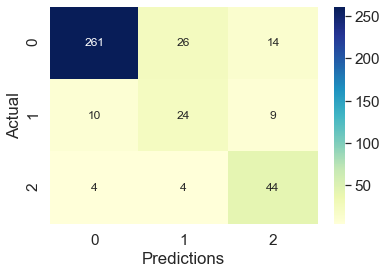

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA[X_PCA.columns[:8]], y, test_size=0.3, random_state=0) # 70 - 30 split
clf = SVC(gamma='auto', kernel='linear')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
confusion_matrix = pd.crosstab(predictions, y_test, rownames=['Actual'], colnames=['Predictions'])

import seaborn as sn

sn.set(font_scale=1.4)
sn.heatmap(confusion_matrix, annot=True,annot_kws={"size": 12}, fmt="d", cmap="YlGnBu")
plt.show()
